In [87]:
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import numpy as np
from math import *
from statistics import stdev
import matplotlib.pyplot as plt
from openpiv import tools, pyprocess, validation, filters, scaling 

In [66]:
folder = '/home/matteo/PIV'

Data = np.genfromtxt(folder + '/win_def/Open_PIV_results_32_Test_1/meanField2.txt',
    delimiter='	',
    names=True,
    dtype=None)
    
# Data = np.genfromtxt(folder + '/Vector_field/exp1_meanField.txt',
#    delimiter='	',
#    names=True,
#    dtype=None)

np.genfromtxt(folder + '/Vector_field/exp1_meanField.txt',
    delimiter='	',
    names=True,
    dtype=None)

array([( 0.8793,  0.9694, 0.0069, -0.0256, 0., 0.),
       ( 1.24  ,  0.9694, 0.008 , -0.0229, 0., 0.),
       ( 1.6007,  0.9694, 0.0115, -0.0192, 0., 0.), ...,
       (43.0837, 44.256 , 0.0112,  0.0369, 0., 0.),
       (43.4444, 44.256 , 0.0128,  0.0384, 0., 0.),
       (43.8051, 44.256 , 0.0075,  0.0386, 0., 0.)],
      dtype=[('x', '<f8'), ('y', '<f8'), ('u', '<f8'), ('v', '<f8'), ('s2n', '<f8'), ('mask', '<f8')])

In [67]:
# The two-dimensional domain of the fit.
X, Y = Data['x'], Data['y']


# The function to be fit is u [n x m]
u_mean = Data['u']
v_mean = Data['v']

# The mathematical approximation function is U:
def U(x, y, A, B):
  return (A/(x)) * np.exp(-((y)**2)/((B*(x))**2))
# return (A/(x-x0)) * np.exp(-(y-y0)**2/(B*(x-x0)))


# This is the callable that is passed to curve_fit.M is a (2,N) array
# where N is the total number of data points in Z, which will be ravelled
# to one dimension.
def func(M, *args):
  xx, yy = M
  arr = np.zeros(xx.shape)
  arr += U(xx, yy, *args)
  return arr

# origin of the nozzle
x0 = 45/2 + 80  # 45/2 sarebbe il centro della finestra + 80mm distanza dall'ugello [ref PIV challenge]
y0 = 45/2       # CHECK!!!!!!!!!!!!!!!!!


In [68]:
max(u_mean)*22.18


98.011202

In [69]:
# Initial guess of the parameters
u_max = max(u_mean)
max_index = np.where(u_mean == u_max)

A0 = -6094
B0 = -0.1313
p0 = [A0, B0]


In [70]:
# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
coord = np.vstack((-X + x0, Y - y0))

# LEAST SQUARES
p_opt, p_cov = curve_fit(func, coord, u_mean, p0)
# delta = 1000
 #while delta > 70:
 #   p_opt, p_cov = curve_fit(func, coord, u_mean, p_opt)
  #  delta = abs(p_opt[0] - p0[0])

print('Fitted parameters:')
print(p_opt)
print()
print(-6094/p_opt[0])
print()
print(-0.1313/p_opt[1])

Fitted parameters:
[-1.38665305e+04 -9.72292210e-02]

0.4394754689933718

1.350417072332468


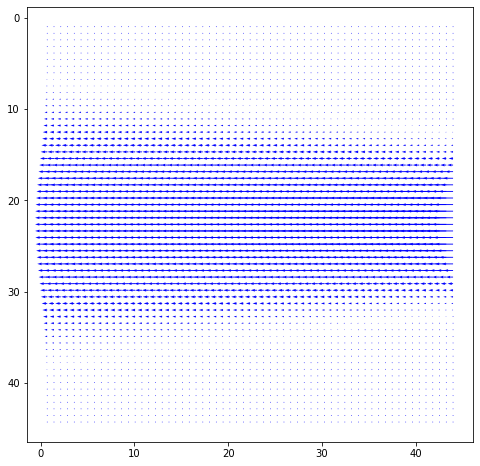

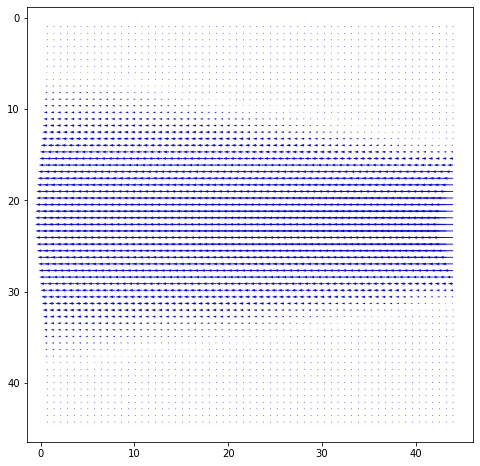

In [71]:
# Camera
resolution = (992,1004) #pixel
physical_window = (45,45) # m
scaling_factor = 1/(np.mean(physical_window)/np.mean(resolution)) # m/pixel




#save in the simple ASCII table format
vmean = np.zeros(X.shape)
mask = np.zeros(X.shape, dtype=bool)
snr = np.zeros(X.shape)
U_mean = func(coord, p_opt[0], p_opt[1])
tools.save(X, Y, U_mean, vmean, snr, mask, folder + '/Vector_field/' + 'testLS_th.txt' )
tools.save(X, Y, u_mean, vmean, snr, mask, folder + '/Vector_field/' + 'testLS_exp.txt' )

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field( folder + '/Vector_field/' + 'testLS_th.txt' , 
                           ax=ax, scaling_factor=scaling_factor, 
                           scale= 5000, # scale defines here the arrow length
                           width= 0.002, # width is the thickness of the arrow
                           on_img=False, # overlay on the image
                           image_name= 'None');

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field( folder + '/Vector_field/' + 'testLS_exp.txt' , 
                           ax=ax, scaling_factor=scaling_factor, 
                           scale= 5000, # scale defines here the arrow length
                           width= 0.002, # width is the thickness of the arrow
                           on_img=False, # overlay on the image
                           image_name= 'None');

In [72]:
#fit = np.zeros(Z.shape)
#fit +=  U(X, Y, x0, y0, p_opt[0], p_opt[1])
rms = np.sqrt(np.mean((u_mean - U_mean)**2))
print('RMS residual =', rms)

RMS residual = 4.686021117977636


In [73]:
# mean centerline  velocity
# A == p_opt[0]
def U_centerline(x, x0, A):
  return A/(x-x0) 

# mean jet width
# B == p_opt[1]
def jet_width(x, x0, B):
  return (x-x0)*B

# reduced radial coordinate
def similarity_variable(y, y0, *args):
  width = args
  return (y-y0)/width

In [74]:
# My field 
x1 = X[0]
y1 = Y[0]
n = np.sum(X==x1)
m = np.sum(Y==y1)

print(n) # intervalli in y
print(m) # intervalli in x

61
61


In [75]:
X_1 = X.reshape(n,m)
print(X_1)

print()
print()
print()

Y_1 = Y.reshape(n,m)
print(Y_1)

print()
print()
print()

U_1 = u_mean.reshape(n,m)
print(U_1)

print()
print()
print()

V_1 = v_mean.reshape(n,m)
print(V_1)

[[ 0.6989  1.4203  2.1418 ... 42.5426 43.264  43.9855]
 [ 0.6989  1.4203  2.1418 ... 42.5426 43.264  43.9855]
 [ 0.6989  1.4203  2.1418 ... 42.5426 43.264  43.9855]
 ...
 [ 0.6989  1.4203  2.1418 ... 42.5426 43.264  43.9855]
 [ 0.6989  1.4203  2.1418 ... 42.5426 43.264  43.9855]
 [ 0.6989  1.4203  2.1418 ... 42.5426 43.264  43.9855]]



[[ 0.9694  0.9694  0.9694 ...  0.9694  0.9694  0.9694]
 [ 1.6909  1.6909  1.6909 ...  1.6909  1.6909  1.6909]
 [ 2.4123  2.4123  2.4123 ...  2.4123  2.4123  2.4123]
 ...
 [42.8131 42.8131 42.8131 ... 42.8131 42.8131 42.8131]
 [43.5346 43.5346 43.5346 ... 43.5346 43.5346 43.5346]
 [44.256  44.256  44.256  ... 44.256  44.256  44.256 ]]



[[-0.103  -0.1394 -0.4006 ...  2.795   2.6832  2.6995]
 [-0.6944 -0.5572 -0.5874 ...  2.4727  2.5022  2.532 ]
 [-1.5206 -1.3991 -1.3594 ...  2.5868  2.4938  2.4882]
 ...
 [ 2.5794  2.5542  2.5233 ...  1.4341  1.1428  1.0991]
 [ 3.2986  3.4365  3.5359 ...  1.1804  1.1612  1.2506]
 [ 3.454   3.559   3.9543 ...  1.3833  1.0

In [76]:
U_c = U_centerline(X_1[0,:], x0, p_opt[0])
Width = jet_width(X_1[0,:], x0, p_opt[1])

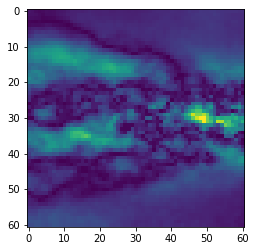

In [77]:
U_rms = np.sqrt(((u_mean - U_mean)/np.mean(U_c))**2)
plt.imshow(U_rms.reshape(n,m))

x = 43.9855 mm
x = 22.3422 mm
x = 1.4203 mm


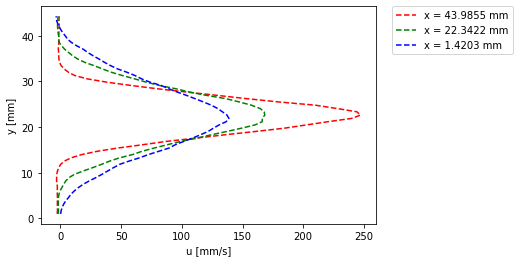

In [78]:
# Plot some velocity profile at different x
m1 = m - 1
x_1 = X_1[0,m1]
print('x =', x_1, 'mm')
y_1 = Y_1[:,0]
u_1 = U_1[:,m1]

m2 = m//2
x_2 = X_1[0,m2]
print('x =', x_2, 'mm')
y_2 = Y_1[:,0]
u_2 = U_1[:,m2]

m3 = 1
x_3 = X_1[0,m3]
print('x =', x_3, 'mm')
y_3 = Y_1[:,0]
u_3 = U_1[:,m3]


plt.plot(-u_1, y_1, 'r--', label='x = %.4f mm' %x_1)
plt.plot(-u_2, y_2, 'g--', label='x = %.4f mm' %x_2)
plt.plot(-u_3, y_3, 'b--', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('u [mm/s]')
plt.ylabel('y [mm]')
plt.show()


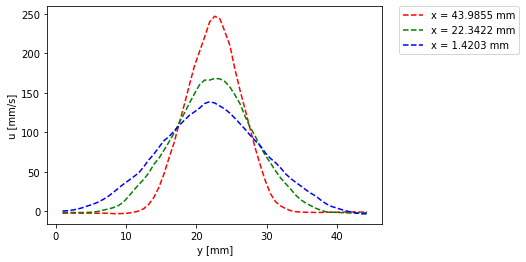

In [79]:
plt.plot(y_1, -u_1,'r--', label='x = %.4f mm' %x_1)
plt.plot(y_2,-u_2,  'g--', label='x = %.4f mm' %x_2)
plt.plot(y_3,-u_3, 'b--', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('y [mm]')
plt.ylabel('u [mm/s]')
plt.show()


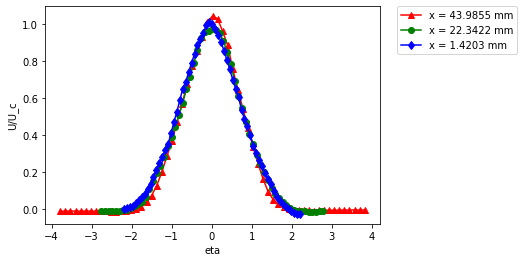

In [80]:
# Plot axial velocity on the similarity variable and adimensionalized by U_c 

U_c = U_centerline(X_1[0,:], x0, p_opt[0])
Width = jet_width(X_1[0,:], x0, p_opt[1])

eta_1 = similarity_variable(Y_1[:,0], y0, Width[m1])
eta_2 = similarity_variable(Y_1[:,0], y0, Width[m2])
eta_3 = similarity_variable(Y_1[:,0], y0, Width[m3])

plt.plot(eta_1, -u_1/U_c[m1], 'r-^', label='x = %.4f mm' %x_1)
plt.plot(eta_2, -u_2/U_c[m2], 'g-o', label='x = %.4f mm' %x_2)
plt.plot(eta_3, -u_3/U_c[m3], 'b-d', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('U/U_c')
plt.show()


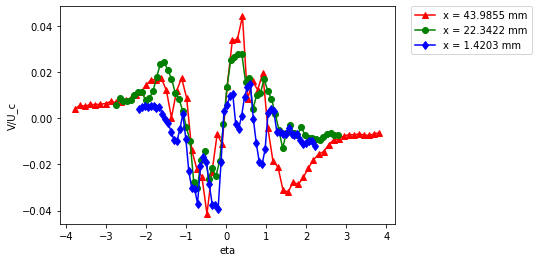

In [81]:
# Plot radial velocity on the similarity variable and adimensionalized by U_c

v_1 = V_1[:,m1]
v_2 = V_1[:,m2]
v_3 = V_1[:,m3]

eta_1 = similarity_variable(Y_1[:,0], y0, Width[m1])
eta_2 = similarity_variable(Y_1[:,0], y0, Width[m2])
eta_3 = similarity_variable(Y_1[:,0], y0, Width[m3])

plt.plot(eta_1, -v_1/U_c[m1], 'r-^', label='x = %.4f mm' %x_1)
plt.plot(eta_2, -v_2/U_c[m2], 'g-o', label='x = %.4f mm' %x_2)
plt.plot(eta_3, -v_3/U_c[m3], 'b-d', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('V/U_c')
plt.show()

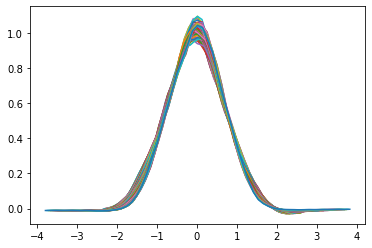

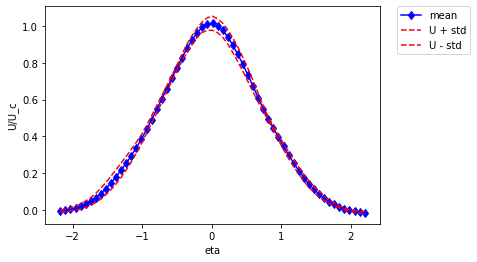

In [88]:
# Mean of the similarity profile on the single eta
ETA = np.zeros((n, m))
U_normalized = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        ETA[i, j] = similarity_variable(Y_1[i,0], y0, Width[j])
        U_normalized[i, j] = U_1[i, j]/U_c[j]
plt.plot(ETA, -U_normalized)
plt.show()

Unorm_mean = np.zeros(n)
errU = np.zeros(n)
ETA0 = ETA[:,0]
U_x = np.zeros((n, m))
U_x[:,0] = U_normalized[:,0]
for s in range(m-1):
    U_x[:,s+1] = np.interp(ETA0, ETA[:, s+1], U_normalized[:, s+1])
    
for t in range(n):
    Unorm_mean[t] = np.mean(U_x[t,:])
    errU[t] = stdev(U_x[t,:])
    
plt.plot(ETA0, -Unorm_mean, 'b-d', label='mean')
plt.plot(ETA0, -Unorm_mean + errU, 'r--', label='U + std')
plt.plot(ETA0, -Unorm_mean - errU, 'r--', label='U - std')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('U/U_c')
plt.show()

#plt.errorbar(ETA0, -Unorm_mean, errU, linestyle='None', marker='^')
#plt.show()

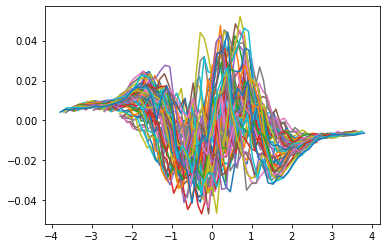

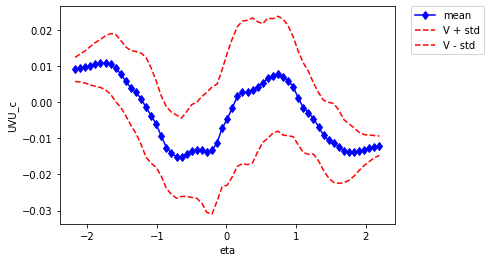

In [89]:
# Mean of the similarity profile on the single eta
V_normalized = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        V_normalized[i, j] = V_1[i, j]/U_c[j]
plt.plot(ETA, -V_normalized)
plt.show()

Vnorm_mean = np.zeros(n)
errV = np.zeros(n)
V_x = np.zeros((n, m))
V_x[:,0] = V_normalized[:,0]
for s in range(m-1):
    V_x[:,s+1] = np.interp(ETA0, ETA[:, s+1], V_normalized[:, s+1])
    
for t in range(n):
    Vnorm_mean[t] = np.mean(V_x[t,:])
    errV[t] = stdev(V_x[t,:])
    
plt.plot(ETA0, -Vnorm_mean, 'b-d', label='mean')
plt.plot(ETA0, -Vnorm_mean + errV, 'r--', label='V + std')
plt.plot(ETA0, -Vnorm_mean - errV, 'r--', label='V - std')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('UVU_c')
plt.show()

#plt.errorbar(ETA0, -Vnorm_mean, errV, linestyle='None', marker='^')
#plt.show()

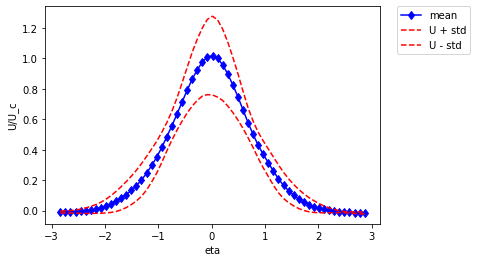

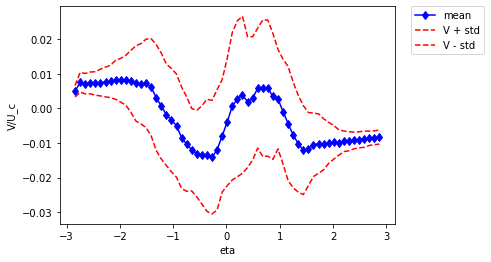

In [90]:
# Mean of the similarity profile on the mean of eta
Uc_mean = np.mean(U_c)
err_Uc = stdev(U_c)
idx = (np.abs(Uc_mean - U_c)).argmin()
eta_m = similarity_variable(Y_1[:,0], y0, Width[idx])

U_MEAN = np.zeros(n)
V_MEAN = np.zeros(n)
errU_MEAN = np.zeros(n)
errV_MEAN = np.zeros(n)
err_plotU = np.zeros(n)
err_plotV = np.zeros(n)
for i in range(n):
    U_MEAN[i] = np.mean(U_1[i,:])
    V_MEAN[i] = np.mean(V_1[i,:])
    errU_MEAN[i] = stdev(U_1[i,:])
    errV_MEAN[i] = stdev(V_1[i,:])
    err_plotU[i] = sqrt((errU_MEAN[i])**2/(Uc_mean**2) + ((U_MEAN[i])**2)/(Uc_mean**4)*err_Uc**2)
    err_plotV[i] = sqrt((errV_MEAN[i])**2/(Uc_mean**2) + ((V_MEAN[i])**2)/(Uc_mean**4)*err_Uc**2)


plt.plot(eta_m, -U_MEAN/Uc_mean, 'b-d', label='mean')
plt.plot(eta_m, -U_MEAN/Uc_mean + err_plotU, 'r--', label='U + std')
plt.plot(eta_m, -U_MEAN/Uc_mean - err_plotU, 'r--', label='U - std')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('U/U_c')
plt.show()

plt.plot(eta_m, -V_MEAN/Uc_mean, 'b-d', label='mean')
plt.plot(eta_m, -V_MEAN/Uc_mean + err_plotV, 'r--', label='V + std')
plt.plot(eta_m, -V_MEAN/Uc_mean - err_plotV, 'r--', label='V - std')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('V/U_c')
plt.show()

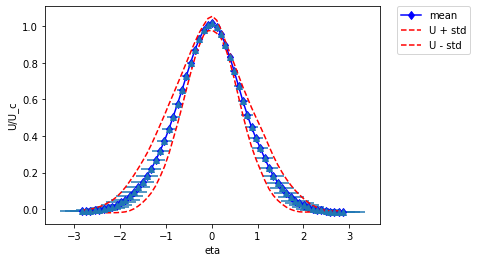

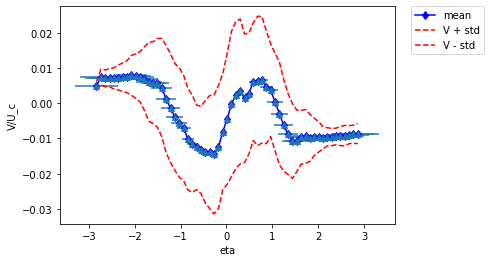

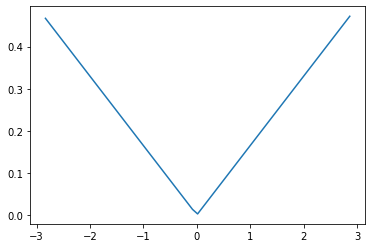

In [91]:
U_m = np.zeros(n)
V_m = np.zeros(n)
Eta_m = np.zeros(n)
err_Um = np.zeros(n)
err_Vm = np.zeros(n)
err_Etam = np.zeros(n)
for i in range(n):
    U_m[i] = np.mean(U_normalized[i,:])
    V_m[i] = np.mean(V_normalized[i,:])
    Eta_m[i] = np.mean(ETA[i,:])
    err_Um[i] = stdev(U_normalized[i,:])
    err_Vm[i] = stdev(V_normalized[i,:])
    err_Etam[i] = stdev(ETA[i,:])


plt.plot(Eta_m, -U_m, 'b-d', label='mean')
plt.plot(Eta_m, -U_m + err_Um, 'r--', label='U + std')
plt.plot(Eta_m, -U_m - err_Um, 'r--', label='U - std')
plt.errorbar(Eta_m, -U_m, xerr=err_Etam, linestyle='None', marker='^')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('U/U_c')
plt.show()

plt.plot(Eta_m, -V_m, 'b-d', label='mean')
plt.plot(Eta_m, -V_m + err_Vm, 'r--', label='V + std')
plt.plot(Eta_m, -V_m - err_Vm, 'r--', label='V - std')
plt.errorbar(Eta_m, -V_m, xerr=err_Etam, linestyle='None', marker='^')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('V/U_c')
plt.show()

plt.plot(Eta_m, err_Etam, label='error of eta')
plt.show()

In [127]:
window_width = 32/scaling_factor # in mm 
delta_eta = window_width/Width[0] # voglio trovare il delta eta più piccolo 
delta_eta 

0.07288743683956803

In [120]:
6/delta_eta

41.1593565377155

In [126]:
pippo = ETA0[1:] - ETA0[0:-1]
pippo

array([0.07289321, 0.0728831 , 0.07289321, 0.0728831 , 0.07289321,
       0.0728831 , 0.0728831 , 0.07289321, 0.0728831 , 0.07289321,
       0.0728831 , 0.07289321, 0.0728831 , 0.0728831 , 0.07289321,
       0.0728831 , 0.07289321, 0.0728831 , 0.07289321, 0.0728831 ,
       0.0728831 , 0.07289321, 0.0728831 , 0.07289321, 0.0728831 ,
       0.07289321, 0.0728831 , 0.0728831 , 0.07289321, 0.0728831 ,
       0.07289321, 0.0728831 , 0.07289321, 0.0728831 , 0.0728831 ,
       0.07289321, 0.0728831 , 0.07289321, 0.0728831 , 0.07289321,
       0.0728831 , 0.0728831 , 0.07289321, 0.0728831 , 0.07289321,
       0.0728831 , 0.07289321, 0.0728831 , 0.0728831 , 0.07289321,
       0.0728831 , 0.07289321, 0.0728831 , 0.07289321, 0.0728831 ,
       0.0728831 , 0.07289321, 0.0728831 , 0.07289321, 0.0728831 ])